# Persoalan Regresi
Gunakan arsitektur Fully Connected Neural Network dan dataset Boston 
Housing Price untuk persolan regressi ini. Untuk model Fully Connected Neural 
Network, lakukan eksploarsi untuk menjawab pertanyaaan-pertanyaan sebagai 
berikut:
1. Berapa banyaknya hidden layar yang optimal?
2. Berapa banykanya hidden unit yang optimal di setiap hidden layar?
3. Apa activation function di setiap layaer sehingga hasilnya optimal?
4. Dari semua pilihan optimer, apa optimizer yang hasilnya optimal?
5. Dari semua pilihan loss function, apa yang hasilnya optimal?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Load Dataset Boston Housing Price

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# Data Exploration and Preprocessing


In [4]:
#ukuran data
house_df.shape

(506, 14)

In [5]:
#Pengecekan apakah ada nilai yang NAN
house_df.isnull().values.any()

False

In [6]:
#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


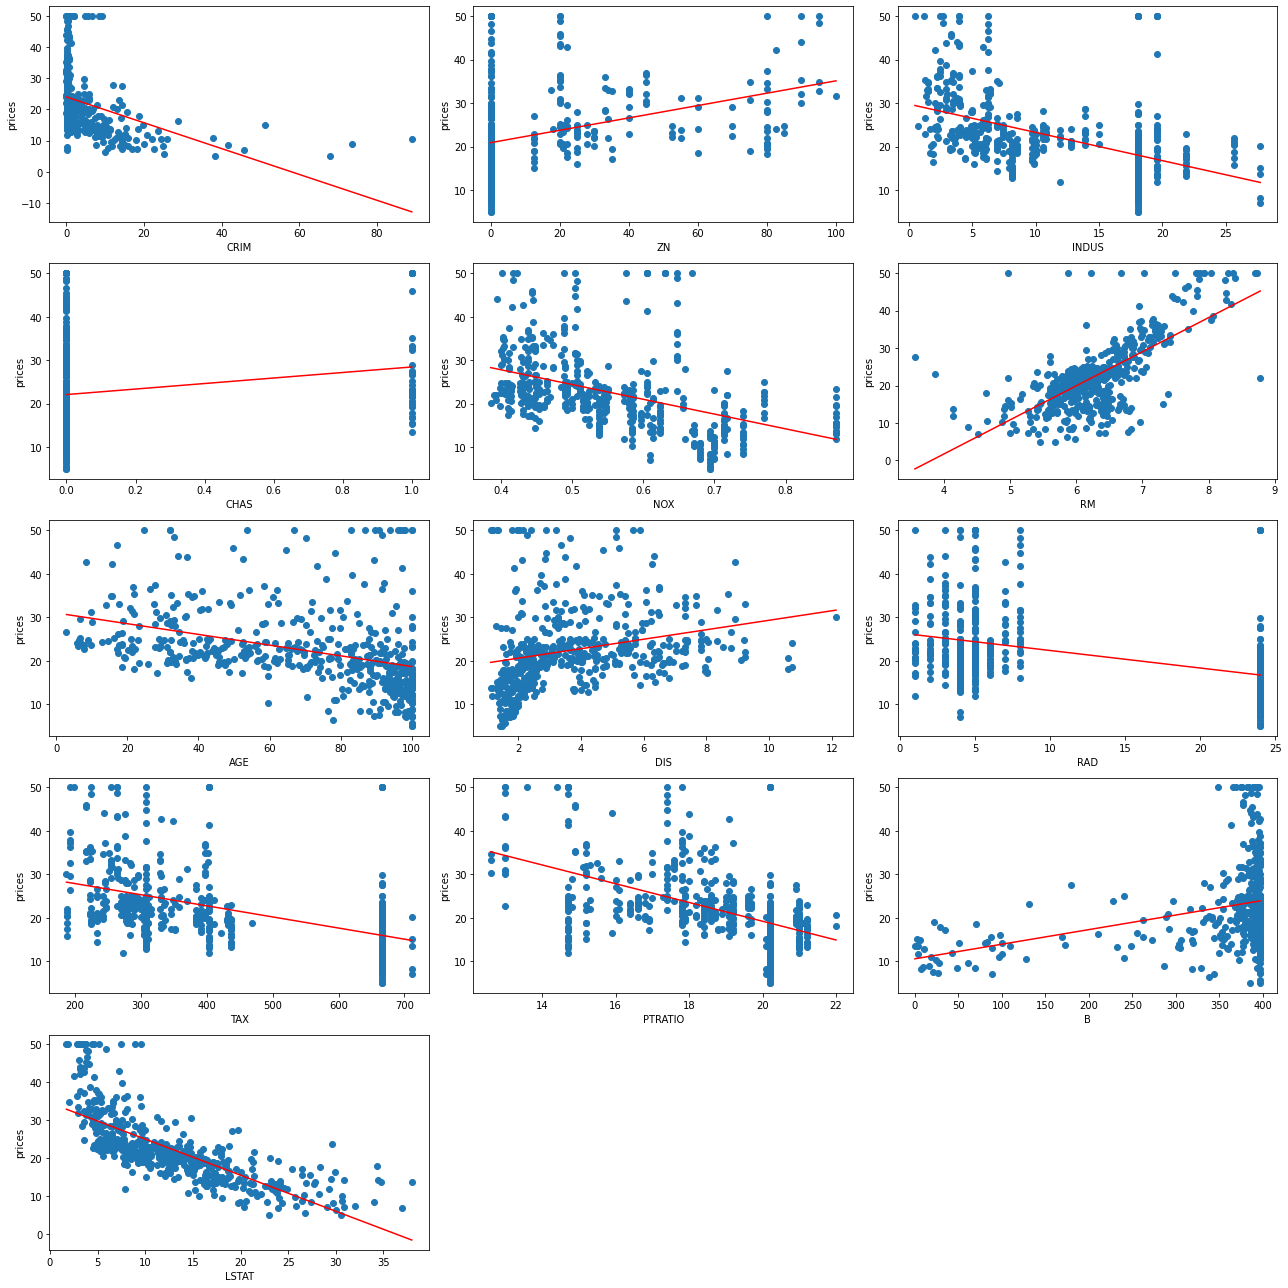

In [7]:
'''=== Plot untuk menunjukkan hubungan linier antara fitur dan harga (MEDV). Dengan demikian, ini memberikan bahwa seberapa tersebar data fitur dan harga serta
 fitur mana yang lebih berdampak dalam prediksi harga rumah. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))
# fig.tight_layout()

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    plt.tight_layout()

# Memisahkan antara Fitur unutk training dan Target (MEDV)

In [8]:
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head(n=10))
print('\n',target.head(n=10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.1

# Normalisasi Nilai Fitur dan Pembagian Dataset




In [9]:
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [10]:
# Membagi dataset --> train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)

training data shape:  (404, 13)
testing data shape:  (102, 13)


# Model Fully Connceted Network 

Proses mendapatkan model FC layer yang optimal dimulai dengan menetapkan arsitektur dan nilai hyperparameter awal yang akan digunakan. Aristektur awal yang digunakan memanfaatkan 2 hidden layer dengan jumlah hidden units 128 untuk setiap layer nya.  Hyperparameter lain yang digunakan dapat dilihat pada Tabel 1 dan untuk model arsitektur awalnya dapat dilihat pada Gambar dibawah.

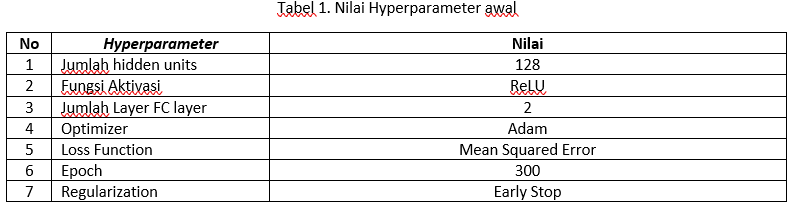

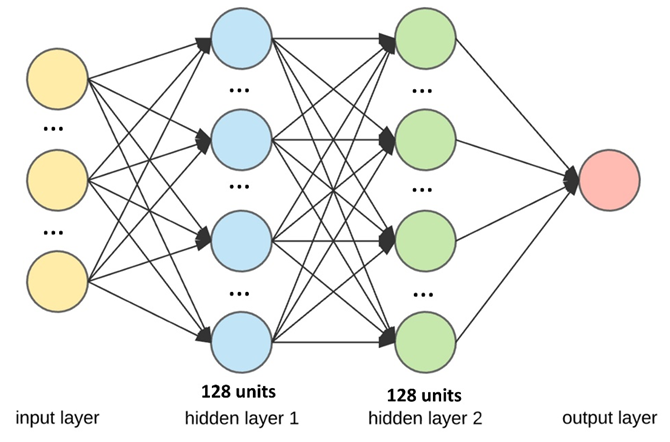



# Model (2 Hidden Layer)

In [ ]:
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(n_cols,)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


# Model (4 Hidden Layer)

Karena model 4 layer ini memiliki kinerja yang optimal untuk itu dicoba mengganti jumlah hidden units disetiap layernya

In [11]:
n_cols = X_train.shape[1]
# hidden_units=64
# hidden_units=128
# hidden_units=256
# hidden_units=512
hidden_units=1024
# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(hidden_units, activation=tf.nn.relu,input_shape=(n_cols,)))
model.add(keras.layers.Dense(hidden_units, activation=tf.nn.relu))
model.add(keras.layers.Dense(hidden_units, activation=tf.nn.relu))
model.add(keras.layers.Dense(hidden_units, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='huber', optimizer='Adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              14336     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,164,161
Trainable params: 3,164,161
Non-trainable params: 0
_________________________________________________________________


# Dari hasil percobaan  diatas dengan menjawab 2 pertanyaan awal didapatkan Arsitektur selanjutnya sebagai berikut:
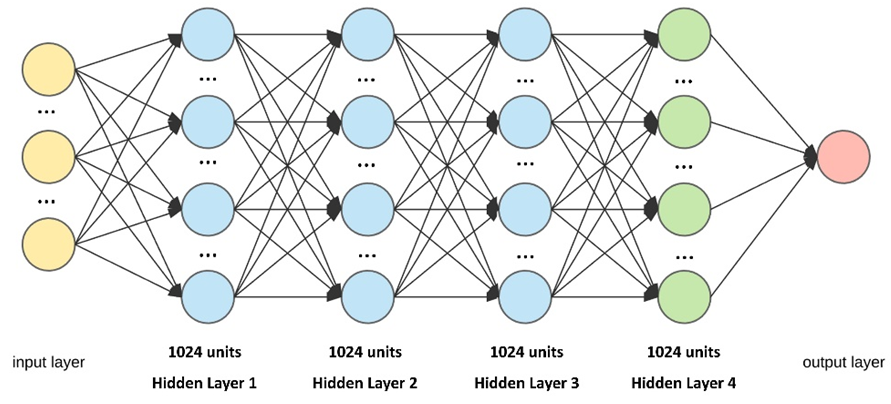

# Model (8 Hidden Layer)

In [ ]:
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(n_cols,)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1792      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)              

# Model (16 Hidden Layer)

In [ ]:
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(n_cols,)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1792      
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)              

# Training model

In [12]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
11/11 [==============================] - 1s 20ms/step - loss: 15.1482 - mae: 15.6438 - val_loss: 5.2289 - val_mae: 5.7006
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 5.8956 - mae: 6.3673 - val_loss: 5.3476 - val_mae: 5.8384
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 5.2146 - mae: 5.6902 - val_loss: 4.8752 - val_mae: 5.3605
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 5.2958 - mae: 5.7705 - val_loss: 5.3781 - val_mae: 5.8648
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 5.5575 - mae: 6.0394 - val_loss: 4.3935 - val_mae: 4.8397
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 5.6271 - mae: 6.1006 - val_loss: 4.3557 - val_mae: 4.8165
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 5.0883 - mae: 5.5593 - val_loss: 4.7133 - val_mae: 5.1772
Epoch 8/300
11/11 [==============================] - 0s 5ms/step - loss: 5.1645 

In [ ]:
model.save('/content/drive/MyDrive/Tugas Hyperparamater Fully Connected LAyer/Model (4 Hidden Layer, 1024 Hidden Units, loss=huber)') 

# Plot Model Loss Hasil Training dan validasi

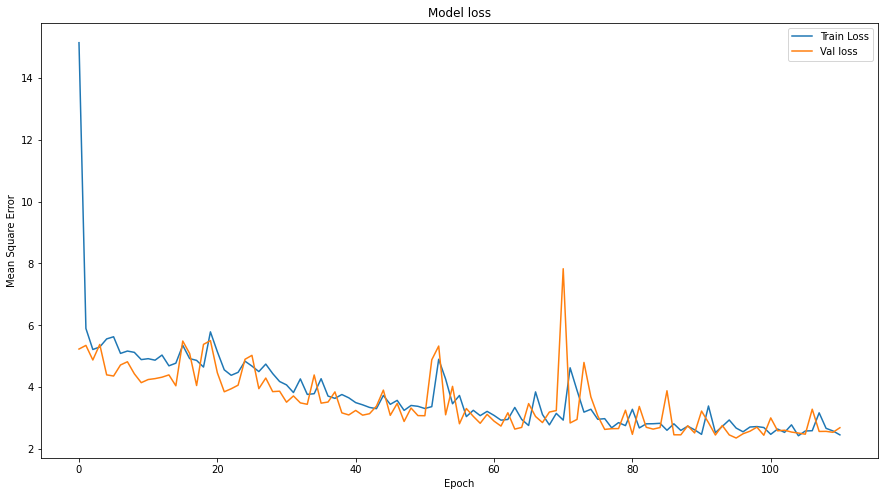

In [13]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

# Evaluasi di tes set

In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 2.4003 - mae: 2.8715
loss value:  2.400315999984741
Mean absolute error:  2.871450424194336


In [15]:
'''=== prediksi harga rumah ==='''

test_predictions = model.predict(X_test).flatten()
print(test_predictions)

[27.84372   41.105488  19.455772  26.561295  17.90381   20.429844
 18.381157  15.713284  21.839075  20.05741   20.763348  18.505182
  7.237814  20.538618  20.67626   22.705486  20.91472   11.312003
 46.97061   16.229023  27.857225  28.521399  15.720336  22.67363
 17.473976  15.378592  23.362026  11.164922  20.119968  20.065695
 20.991253  25.412857  17.453764  26.013647  14.576468  16.847431
 34.043945  22.974077  20.582193  24.305614  16.684614  35.15957
 49.66719   20.078663  25.765541  17.549921  16.925037  25.256731
 18.82745   36.321434  20.656584  37.69867   17.926434  26.78269
 47.590473  23.207031  18.677118  37.895153  23.49628   16.672136
 22.096344  34.394268  34.714016  16.743797  25.607641  18.294966
 17.343632  26.10309   35.004063  11.38606   21.049715  28.540306
 11.108636  23.078278  22.399214   9.702606  20.888708  46.74388
 13.464445  15.61588   22.943909  12.316769  22.933924  12.541153
 21.842503  29.214497  16.769539  26.727583  27.665178  19.449133
 24.012466   7

In [16]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(15)

,True Value,Predicted Value
0,23.6,27.843719
1,32.4,41.105488
2,13.6,19.455772
3,22.8,26.561295
4,16.1,17.903811
5,20.0,20.429844
6,17.8,18.381157
7,14.0,15.713284
8,19.6,21.839075
9,16.8,20.057409


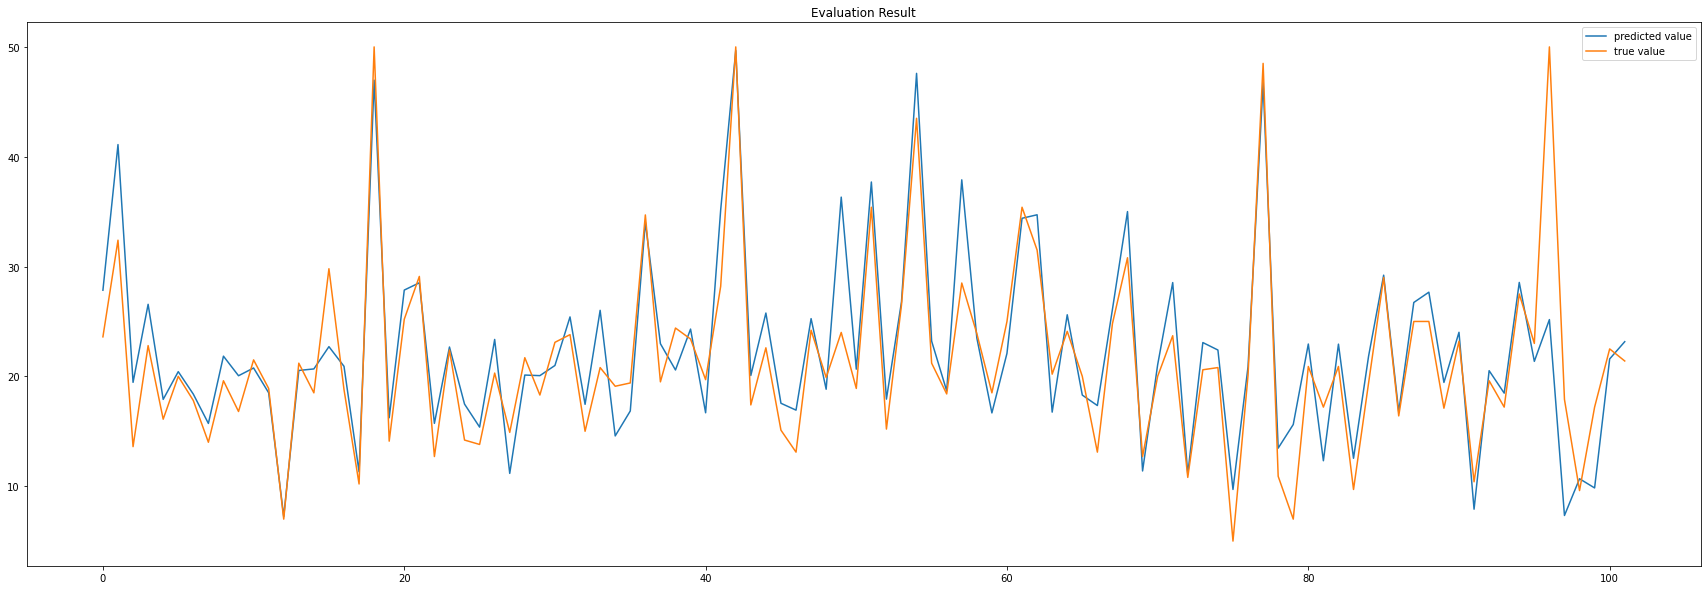

In [17]:
#visualisasi the true value dengan predicted value
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

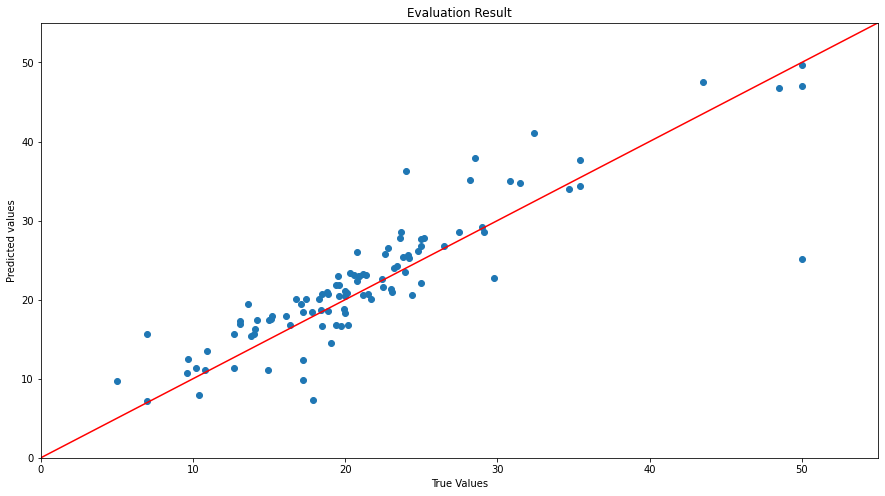

In [18]:
# visualisasi scatter plot
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(15,8)) 
ax.scatter(x,y) 
ax.set(xlim=(0,55), ylim=(0, 55)) 
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') 
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()